<a href="https://colab.research.google.com/github/coldiish/Play-Store-Data-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Understanding which apps are popular and what category of apps generate higher revenue can be beneficial to make profit in a large market cap.</b>

## <b> User reviews tell us how an app is performing and what other apps lack that we can use as build a better product for our customers.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWips2u-GfOtpk7QH5SHIRbfGPVXszDBtRkJ4w0e5QkhyDPAyxD8UEc
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plst = pd.read_csv("/content/drive/MyDrive/Data AlmaBetter/EDA Capstone Project - Airbnb/Play Store Data.csv")
usr_rv = pd.read_csv("/content/drive/MyDrive/Data AlmaBetter/EDA Capstone Project - Airbnb/User Reviews.csv")

In [ ]:
plst.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
usr_rv.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
plst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
plst.keys()

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
plst.shape

(10841, 13)

In [ ]:
plst.corr() # Because only Rating column is float and rest are object data type

,Rating
Rating,1.0


Since only one feature is numeric data, the next step will be to change the data type of the rest of the features.

In [ ]:
plst['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
plst['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
plst['Category'].nunique()

34

In [ ]:
# Removing 1.9
plst['Category'] = plst['Category'].replace('1.9', np.NaN)
plst['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [ ]:
plst['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
plst['Rating'] = plst['Rating'].astype('float64') # Converting Rating to float data type
plst['Rating'].dtype 

dtype('float64')

In [ ]:
plst['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
# plst['Reviews'] = plst['Reviews'].astype('float64') # Converting Reviews to float data type
# plst['Reviews'].dtype 

In [ ]:
plst[plst['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
plst['Reviews'] = plst['Reviews'].replace('3.0M', 3000000.0)

In [ ]:
plst['Reviews'] = plst['Reviews'].astype('float64') # Converting Reviews to float data type
plst['Reviews'].dtype 

dtype('float64')

In [ ]:
plst['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# Removing M and K
plst['Size'] = plst['Size'].str.replace('M', '000')
plst['Size'] = plst['Size'].str.replace('k', '')
plst['Size'] = plst['Size'].str.replace('.', '')

In [ ]:
plst['Size'].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '27000',
       '55000', '17000', '39000', '42000', '70000', '23000', '60000',
       '61000', '46000', '92000', '52000', '11000', '24000',
       'Varies with device', '94000', '15000', '10000', '26000', '80000',
       '79000', '57000', '35000', '54000', '201', '36000', '86000',
       '16000', '34000', '89000', '38000', '32000', '18000', '22000',
       '45000', '98000', '90000', '67000', '30000', '71000', '74000',
       '64000', '82000', '99000', '49000', '95000', '50000', '59000',
       '13000', '73000', '68000', '40000', '72000', '91000', '23',
       '65000', '75000', '51000', '41000', '48000', '85000', '83000',
       '43000', '47000', '78000', '88000', '66000', '79', '84000', '118',
       '44000', '695', '62000', '18', '53000', '58000', '96000', '63000',
       '77000', '69000', '93000', '100000', '81000', '97000', '556',
       '526', '76000', 

In [ ]:
plst['Size'] = plst['Size'].replace('Varies with device', np.nan)
plst['Size'] = plst['Size'].replace('1,000+', 1000.0)
plst['Size'].unique()

array(['19000', '14000', '87000', '25000', '28000', '56000', '29000',
       '33000', '31000', '12000', '20000', '21000', '37000', '27000',
       '55000', '17000', '39000', '42000', '70000', '23000', '60000',
       '61000', '46000', '92000', '52000', '11000', '24000', nan, '94000',
       '15000', '10000', '26000', '80000', '79000', '57000', '35000',
       '54000', '201', '36000', '86000', '16000', '34000', '89000',
       '38000', '32000', '18000', '22000', '45000', '98000', '90000',
       '67000', '30000', '71000', '74000', '64000', '82000', '99000',
       '49000', '95000', '50000', '59000', '13000', '73000', '68000',
       '40000', '72000', '91000', '23', '65000', '75000', '51000',
       '41000', '48000', '85000', '83000', '43000', '47000', '78000',
       '88000', '66000', '79', '84000', '118', '44000', '695', '62000',
       '18', '53000', '58000', '96000', '63000', '77000', '69000',
       '93000', '100000', '81000', '97000', '556', '526', '76000', '334',
       '232', '62

In [ ]:
plst['Size'] = plst['Size'].astype('float64')
plst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
plst['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
plst['Installs'] = plst['Installs'].replace('Free', np.nan)

In [ ]:
#Removing , and + 
plst['Installs'] = plst['Installs'].str.replace(',', '')
plst['Installs'] = plst['Installs'].str.replace('+', '')
plst['Installs'] = plst['Installs'].astype('float64')

In [ ]:
plst['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

In [ ]:
plst['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Removing the $ sign
# plst['Price'] = plst['Price'].str.replace('$', '')
# plst['Price'].astype(float)

In [ ]:
plst[plst['Price']=='Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,19.0,3000000.0,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Droping the row 10472 from the dataframe
plst.drop(10472, inplace=True)

In [ ]:
plst['Price'] = plst['Price'].str.replace('$', '')
plst['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
 plst['Price'] = plst['Price'].astype(float)
 plst['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
plst['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [ ]:
#Converting to datetime
plst['Last Updated'] = pd.to_datetime(plst['Last Updated'])
plst['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
plst['Last Updated'] = pd.to_datetime(plst['Last Updated'])
plst['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
plst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.2+ MB


In [ ]:
plst.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,38967.975834,1.546434e+07,1.027368
std,0.515219,2.927761e+06,25048.622495,8.502936e+07,15.949703
min,1.000000,0.000000e+00,11.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,19000.000000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,33000.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,55000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


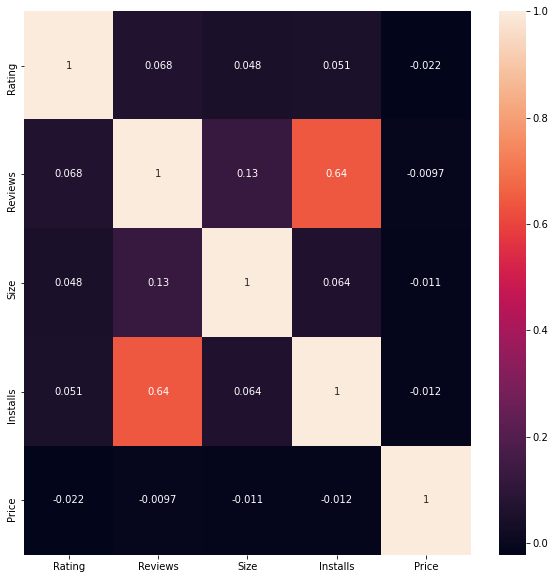

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(plst.corr(), annot=True)

**We can see the positive relations between installs-reviews, rating-reviews and size-reviews.**

In [ ]:
cg_rv = plst.groupby('Category')['Reviews'].sum().reset_index()
cg_rv.sort_values('Reviews', ascending=False, inplace=True)

In [ ]:
cg_rv

,Category,Reviews
14,GAME,1.585422e+09
6,COMMUNICATION,8.154623e+08
27,SOCIAL,6.212414e+08
11,FAMILY,4.102263e+08
29,TOOLS,2.731850e+08
24,PHOTOGRAPHY,2.135166e+08
26,SHOPPING,1.150412e+08
25,PRODUCTIVITY,1.141170e+08
31,VIDEO_PLAYERS,1.103802e+08
23,PERSONALIZATION,8.934614e+07


# Plotting Category and Reviews bar chart to visualize which category has highest number of reivews.

Text(0.5, 1.0, 'Category and Reviews')

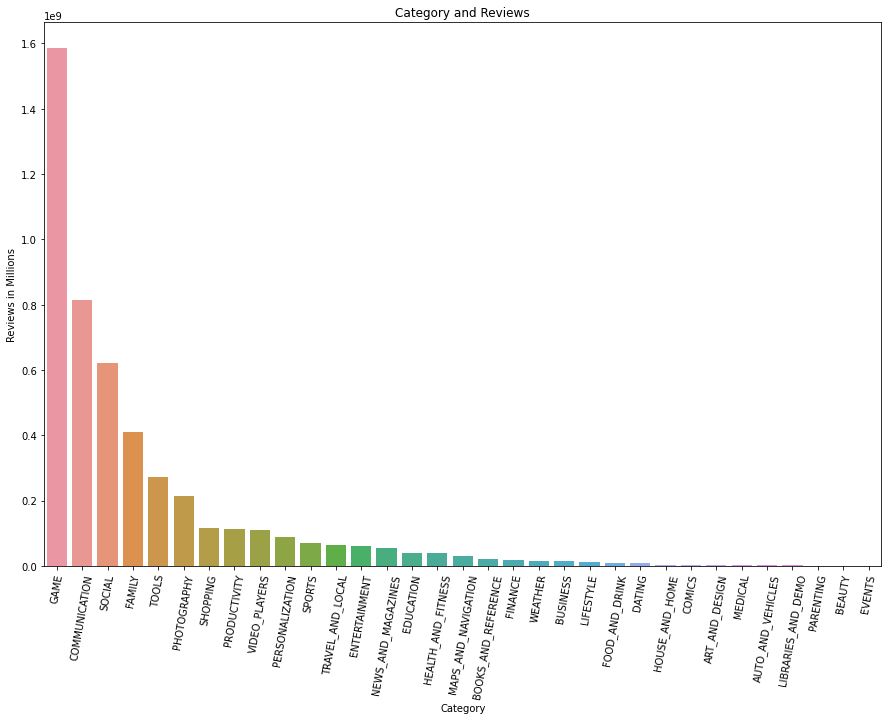

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=cg_rv['Category'], y = cg_rv['Reviews'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews in Millions")
plt.title("Category and Reviews")

In [ ]:
cg_in = plst.groupby('Category')['Installs'].sum().reset_index()
cg_in.sort_values('Installs', ascending=False, inplace=True)

In [ ]:
cg_in

,Category,Installs
14,GAME,3.508602e+10
6,COMMUNICATION,3.264728e+10
25,PRODUCTIVITY,1.417609e+10
27,SOCIAL,1.406987e+10
29,TOOLS,1.145277e+10
11,FAMILY,1.025826e+10
24,PHOTOGRAPHY,1.008825e+10
21,NEWS_AND_MAGAZINES,7.496318e+09
30,TRAVEL_AND_LOCAL,6.868887e+09
31,VIDEO_PLAYERS,6.222003e+09


# Category and Installs

Text(0.5, 1.0, 'Category and Installs')

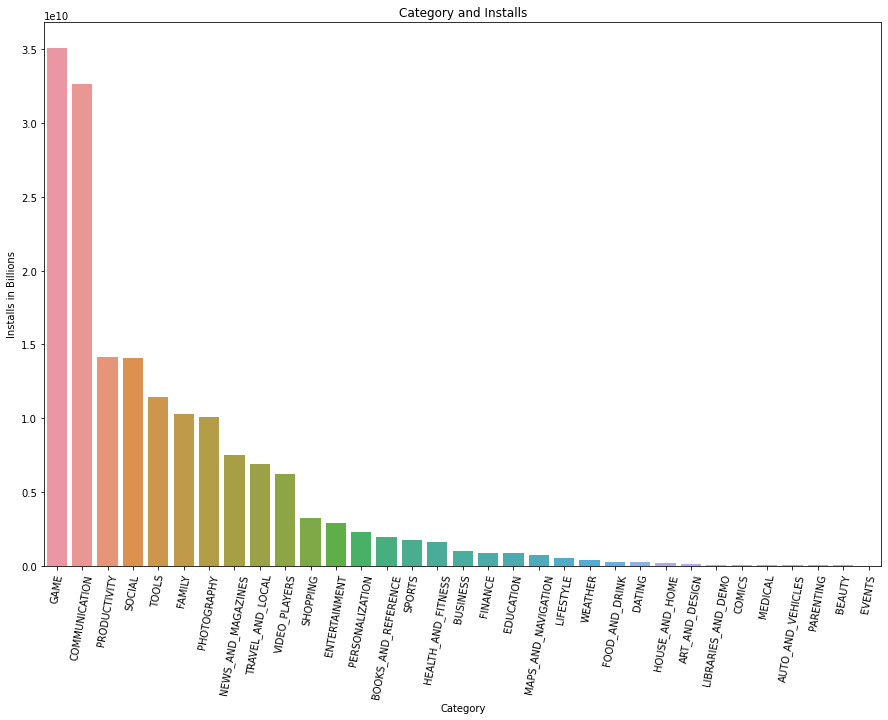

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=cg_in['Category'], y = cg_in['Installs'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Installs in Billions")
plt.title("Category and Installs")

In [ ]:
type_df = plst['Type'].value_counts().reset_index()
type_df

,index,Type
0,Free,10039
1,Paid,800


In the below pie chart we see that less than 8% apps are paid which tells us that most of the app developers generate revenue through in-app purchases.

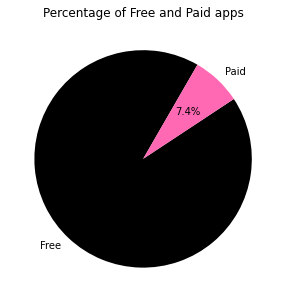

In [ ]:
plt.figure(figsize=(10, 5))
plt.pie(type_df['Type'], labels=type_df['index'], autopct="%.1f%%", startangle=60, colors=['black', 'hotpink'])
plt.title('Percentage of Free and Paid apps')
plt.show()

In [ ]:
paid_df = plst[plst['Type']=='Paid']['Category'].value_counts().reset_index()
paid_df

,index,Category
0,FAMILY,191
1,MEDICAL,109
2,GAME,83
3,PERSONALIZATION,83
4,TOOLS,78
5,BOOKS_AND_REFERENCE,28
6,PRODUCTIVITY,28
7,COMMUNICATION,27
8,SPORTS,24
9,PHOTOGRAPHY,22


Top three paid app categories are Family, Medical and Game/Personalization respectively. 

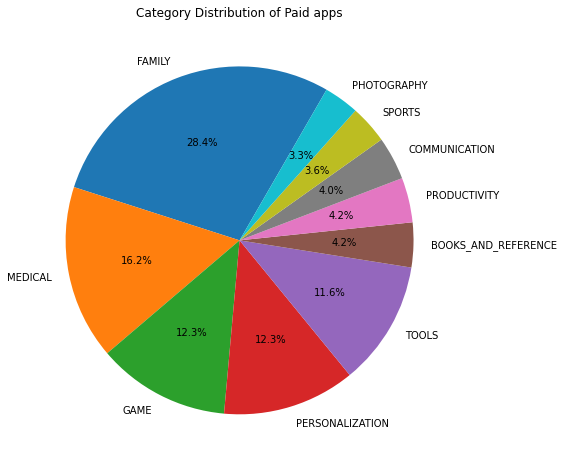

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(paid_df['Category'][:10], labels=paid_df['index'][:10], autopct="%.1f%%", startangle=60)
plt.title('Category Distribution of Paid apps')
plt.show()

In [ ]:
usr_rv.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


User Review Sentiment Analysis

In [ ]:
sentiment_df = usr_rv['Sentiment'].value_counts().reset_index()
sentiment_df

,index,Sentiment
0,Positive,23998
1,Negative,8271
2,Neutral,5163


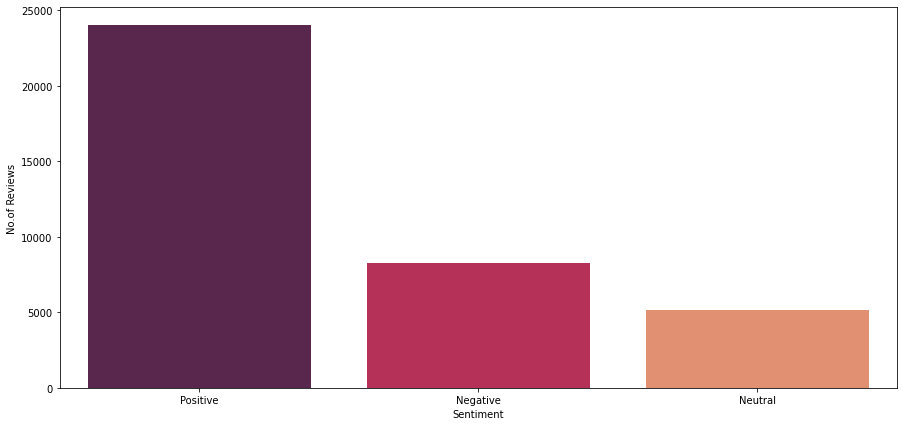

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=sentiment_df['index'], y=sentiment_df['Sentiment'], palette="rocket")
plt.xlabel('Sentiment')
plt.ylabel('No.of Reviews')
plt.show()

In [ ]:
rating_count = plst['Rating'].value_counts().reset_index()
rating_count = rating_count.sort_values('index')
rating_count

,index,Rating
28,1.0,16
38,1.2,1
36,1.4,3
37,1.5,3
35,1.6,4
32,1.7,8
34,1.8,8
30,1.9,13
31,2.0,12
33,2.1,8


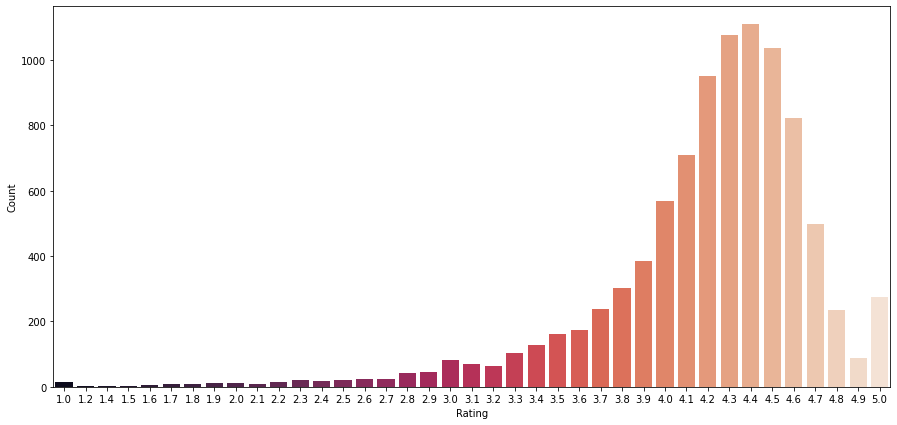

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x=rating_count['index'], y=rating_count['Rating'], palette="rocket")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()